# Handwritten digit recognition

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [8]:
X, y = load_data()

In [10]:
print(f"X.shape = {X.shape}")

X.shape = (1000, 400)


In [13]:
print(f"{X[0]}")

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [17]:
#first and last value of y label
print(f"shape of y: {y.shape}")

print(f"First value : {y[0,0]} and Last value: {y[-1, 0]}")

shape of y: (1000, 1)
First value : 0 and Last value: 1


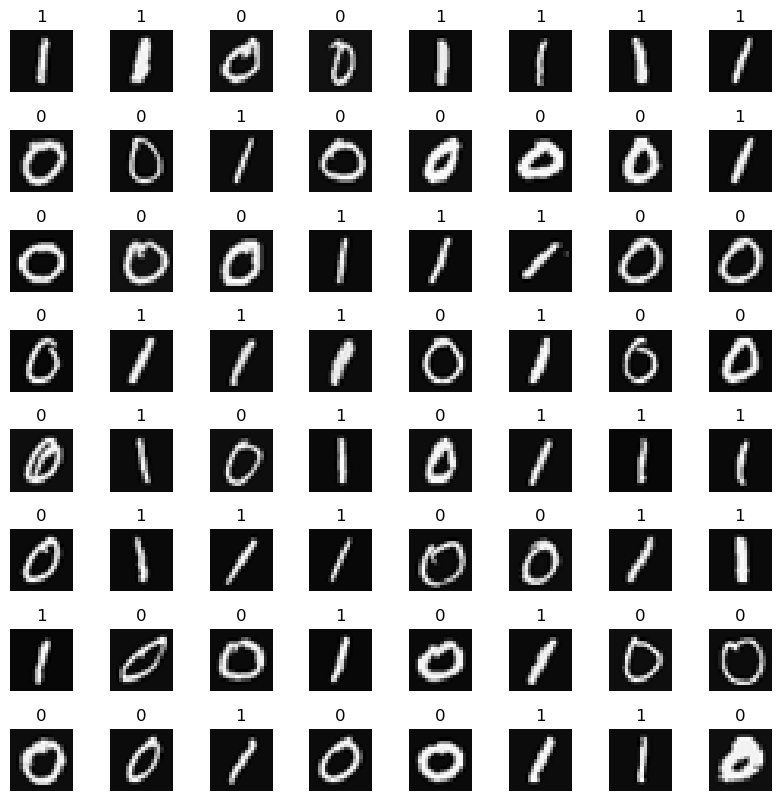

In [20]:
#visualization of data

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

m,n = X.shape

fig, axes = plt.subplots(8,8, figsize = (8,8))
fig.tight_layout(pad = 0.1)

for i,ax in enumerate(axes.flat):
    
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    #display the image
    ax.imshow(X_random_reshaped, cmap = 'gray')
    
    #display the label above each image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

# Neural Network implementation using Tensorflow

In [26]:
model = Sequential([
    tf.keras.Input(shape=(400,)),
    #layer 1
    Dense(units=25, activation='sigmoid'),
    #layer 2
    Dense(units = 15, activation='sigmoid'),
    #layer 3
    Dense(units=1, activation='sigmoid')
], name="Digit_recognition_model")

In [27]:
model.summary()

Model: "Digit_recognition_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
#number of parameters in Layer1, 2 and 3 are:-
L1_num_params = 400*25 + 25 # 400 inputs, 25 w's neurons and 25 b's
L2_num_params = 25*15 + 15 
L3_params = 15*1 + 1

print(f"L1 paramaters: {L1_num_params}, L2 parameters: {L2_num_params}, L3 parameters: {L3_params}")

L1 paramaters: 10025, L2 parameters: 390, L3 parameters: 16


In [32]:
#shape of weights/parameters

[layer1, layer2, layer3] = model.layers

In [35]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()

print(f"W1 shape: {W1.shape}, b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}, b2 shape: {b2.shape}")
print(f"W3 shape: {W3.shape}, b3 shape: {b3.shape}")

W1 shape: (400, 25), b1 shape: (25,)
W2 shape: (25, 15), b2 shape: (15,)
W3 shape: (15, 1), b3 shape: (1,)


In [36]:
#final layer weights
print(model.layers[2].get_weights())

[array([[ 0.43358082],
       [ 0.26699317],
       [ 0.14241242],
       [-0.04535329],
       [-0.07127649],
       [ 0.0290069 ],
       [-0.43127167],
       [-0.5771248 ],
       [-0.1423676 ],
       [ 0.5618014 ],
       [ 0.03730649],
       [-0.09268433],
       [-0.5882804 ],
       [ 0.60257655],
       [-0.43758124]], dtype=float32), array([0.], dtype=float32)]


In [37]:
#defina a loss function and run gradient descent to fit weights

model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(0.001)  #0.001 is the initial learning rate alpha
)

#step 3
model.fit(X, y, epochs = 25)

Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.6537
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.4833
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 0.3267
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 0.2194
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 0.1544
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 0.1165
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 0.0930
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 0.0717
Epoch 9/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 0.0617
Epoch 10/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 0.0510
Epoch 11/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 0.0436
Epoch 12/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 0.0374
Epoch 13/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.0322
Epoch 14/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 0.0356
Epoch 15/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - lo

# Prediction of the output

In [41]:
prediction = model.predict(X[0].reshape(1,400))
print(f"Prediction of 0: {prediction}")

prediction = model.predict(X[500].reshape(1,400))
print(f"Prediction of 1 : {prediction_1}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction of 0: [[0.00946784]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Prediction of 1 : [[0.98869854]]


# Setting a threshold value

In [42]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
    
print(f"Prediction after setting threshold value: {yhat}")

Prediction after setting threshold value: 1


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X.shape

fig,axes = plt.subplots(8,8, figsize=(8,8))

fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    ax.imshow(X_random_reshaped, cmap = 'gray')
    
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
        
    #display label over image
    
    ax.set_title(f"{y[random_index,0]}, {yhat}")
    ax.set_axis_off()
    
fig.suptitle("Label, yhat", fontsize = 16)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
